# **Fair and Equitable AI in Recommendation Systems**
## **Kyanon Digital**
### **Abraham Ighalo - Data Engineer**
#### **April 2025**



### 1. Introduction
**Recommendation systems** play a central role in shaping user experiences across digital platforms, including e-commerce, media streaming, social networks, and hiring platforms. As these systems increasingly influence access to information, opportunities, and resources, it becomes critical to ensure that they operate in a fair and equitable manner.

**Fairness in Recommendation Systems**
**Fairness** in recommendation systems refers to the absence of unjust or systematic bias in the way content, opportunities, or resources are suggested to users.

**Equity in Recommendation Systems**
**Equity** in recommendation systems involves proactively addressing structural disadvantages and promoting inclusivity through algorithmic design and policy.


# MLFlow Settings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
!pip install -r /content/drive/MyDrive/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 40.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2025.7.1 requires packaging>=24.1, but you have packaging 23.2 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
datasets 4.0.0 requires pyarrow>=15.0.0, but you have pyarrow 13.0.0 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompati

In [22]:
# Set Up MLflow Tracking
import mlflow
import subprocess
from pyngrok import ngrok, conf
import getpass

MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"
subprocess.Popen(["mlflow", "ui", "--backend-store-uri",MLFLOW_TRACKING_URI])

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_experiment("Advanced_Algorithms_Attention___GOD ABEG")


/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_config.py:373: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


<Experiment: artifact_location='/content/mlruns/1', creation_time=1754912786068, experiment_id='1', last_update_time=1754912786068, lifecycle_stage='active', name='Advanced_Algorithms_Attention___GOD ABEG', tags={}>

In [23]:
#3.Expose MLflow UI using ngrok
from pyngrok import ngrok

In [24]:
from pyngrok import ngrok, conf
import getpass

# Authenticate ngrok
print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/get-started/your-authtoken")
conf.get_default().auth_token = getpass.getpass()

port = 5000
public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\"')


Enter your authtoken, which can be copied from https://dashboard.ngrok.com/get-started/your-authtoken
··········
 * ngrok tunnel "https://9c36df988728.ngrok-free.app" -> "http://127.0.0.1:5000"


In [49]:
# Installing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import surprise



# **Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is a method of analyzing datasets to understand their main characteristics, often using visualization and statistical techniques to summarize data, identify patterns, and reveal relationships. It's an iterative process that helps in gaining initial insights and formulating hypotheses for further analysis. "

**Step 1**: Understand the Problem and Data
**Goal**: Build a recommendation system with filtering criteria that avoids bias from demographic factors, sex, orientation, and popularity

**Data Types**:
* **Numerical**: discounted_price, actual_price, discount_percentage, rating, rating_count
* **Categorical**: product_id, category, user_id, review_id
* **Text**: product_name, about_product, user_name, review_title, review_content
* **URL**: img_link, product_link

In [50]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("karkavelrajaj/amazon-sales-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-sales-dataset


### **Step 2: Import and Inspect Data**
* Load data carefully
* Check data size, missing values, data types
* Identify errors or inconsistencies

In [51]:
#save dataset into a dataframe
dataset = path +"/amazon.csv"
df = pd.read_csv(dataset)

df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


In [52]:
df.shape

(1465, 16)

In [53]:
from tabulate import tabulate

select_top_rows = df.iloc[0:5]
print(tabulate(select_top_rows, headers = 'keys', tablefmt = 'grid'))

#review datatypes
print(f"\n\n\nAmazon Dataset Datatypes:  \n\n{df.dtypes}")


print( f"\n\nHere we have the technical view of the data: \n")
df.info()

+----+--------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------+--------------------+----------------+-----------------------+----------+----------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [54]:
#Descriptive analysis
description = df.describe(include = 'object')
print(tabulate(description, headers = 'keys', tablefmt = 'grid'))

+--------+--------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------+--------------------+----------------+-----------------------+----------+----------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------

From the descriptive analysis we know the following :
* There are a total of 1465 products in this dataset and by
* 1194 unique users( note a user can review multiple items),
* we have 211 unique product categories
* 550 discounted products
The most rated product is the Fire-Boltt Ninja Call Pro Plus 1.83"


https://www.amazon.com/Wayona-Braided-Lightning-Charging-Compatible/dp/B07JW9H4J1

### **Step 3: Handle Missing Data**
* Understand missing data patterns (MCAR, MAR, MNAR)
* Choose strategy: removal or imputation
* Apply suitable imputation methods

In [55]:
#Check for duplictes and misisng values
print(f"Duplicates: {df.duplicated().sum()} \n")
print(f"Missing Values: \n{df.isnull().sum()}")


Duplicates: 0 

Missing Values: 
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


### **Step 4: Explore Data Characteristics**
* Change data types to support calculations
* Calculate summary statistics for numerical variables


### **Step 5: Perform Data Transformation**

* Prepare data for accurate analysis and modeling


In [56]:
'''
Removed currency symbols (₹, ,) and converted data types for:
- rating_count → integer (removed commas, filled NaNs with 0)
- discounted_price → float (removed ₹ and commas)
- actual_price → float (removed ₹ and spaces)
'''


df['rating_count'] = df['rating_count'].str.replace(",", "").fillna(0).astype(int)
df["discounted_price"] = df["discounted_price"].str.replace(r"[₹,]","", regex = True).astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace("%","").astype(int)/100
df["actual_price"] = df["actual_price"].str.replace(r"[₹ ,]","",regex = True).astype(float)


# Verify change
top_5 = df.iloc[0:5]
bottom_5 = df.iloc[-5:]


print(tabulate(top_5 , headers = 'keys', tablefmt = 'grid'))
print(tabulate(bottom_5, headers = 'keys', tablefmt = 'grid'))

+----+--------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------+--------------------+----------------+-----------------------+----------+----------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [57]:
'''
After fixing the data types,
check for inflated discounts where discounted_price > actual_price.
'''
df[df["discounted_price"] > df['actual_price']]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [58]:
'''
summary of the rating column
'''
df['rating'].describe().T

,rating
count,1465
unique,28
top,4.1
freq,244


In [59]:
'''
minimum and max ratings
investigate the column
'''
print (f"The minimum rating is: {df['rating'].min()}")
print (f"The maximum rating is: {df['rating'].max()}")

search_character = df.query("rating == '|'")
print(tabulate(search_character, headers = 'keys', tablefmt = 'grid'))

The minimum rating is: 2
The maximum rating is: |
+------+--------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------+--------------------+----------------+-----------------------+----------+----------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------+-----------------------------------------------------------

In [60]:
'''
Replaced the | character with the rating I found online
Source : https://www.amazon.in/Eureka-Forbes-Vacuum-Cleaner-Washable/dp/B08L12N5H1

'''
#Replace pipe with 1 and cast df to float
df['rating']=df['rating'].str.replace("|","3.9").astype(float)
df['rating'].unique()

array([4.2, 4. , 3.9, 4.1, 4.3, 4.4, 4.5, 3.7, 3.3, 3.6, 3.4, 3.8, 3.5,
       4.6, 3.2, 5. , 4.7, 3. , 2.8, 3.1, 4.8, 2.3, 2. , 2.6, 2.9])

In [61]:
#Verify datatypes
Ratings = df[['user_id','product_id','product_name','rating','discounted_price',	'actual_price', 'discount_percentage',	'rating_count']]
Ratings.dtypes

,0
user_id,object
product_id,object
product_name,object
rating,float64
discounted_price,float64
actual_price,float64
discount_percentage,float64
rating_count,int64


In [62]:
print ("Total Numerical Data")
print ("*"*50)
print (f"Total no of ratings:  {Ratings.shape[0]}")
print (f"Total No of Users: {len(np.unique(Ratings.user_id))}")
print (f"Total No of Products: {len(np.unique(Ratings.discounted_price))}")

print(f"\nThere area total of {Ratings.shape[0]} user ratings in our dataset from {len(np.unique(Ratings.user_id))} unique users with {len(np.unique(Ratings.discounted_price))} products")


Total Numerical Data
**************************************************
Total no of ratings:  1465
Total No of Users: 1194
Total No of Products: 550

There area total of 1465 user ratings in our dataset from 1194 unique users with 550 products


Save CLeaned DataSets



### **Step 6:** Visualize Data Relationships

* Categorical: frequency tables, bar plots, pie charts
* Numerical: histograms, box plots, violin plots
* Relationships: scatter plots, correlation matrices, statistical tests

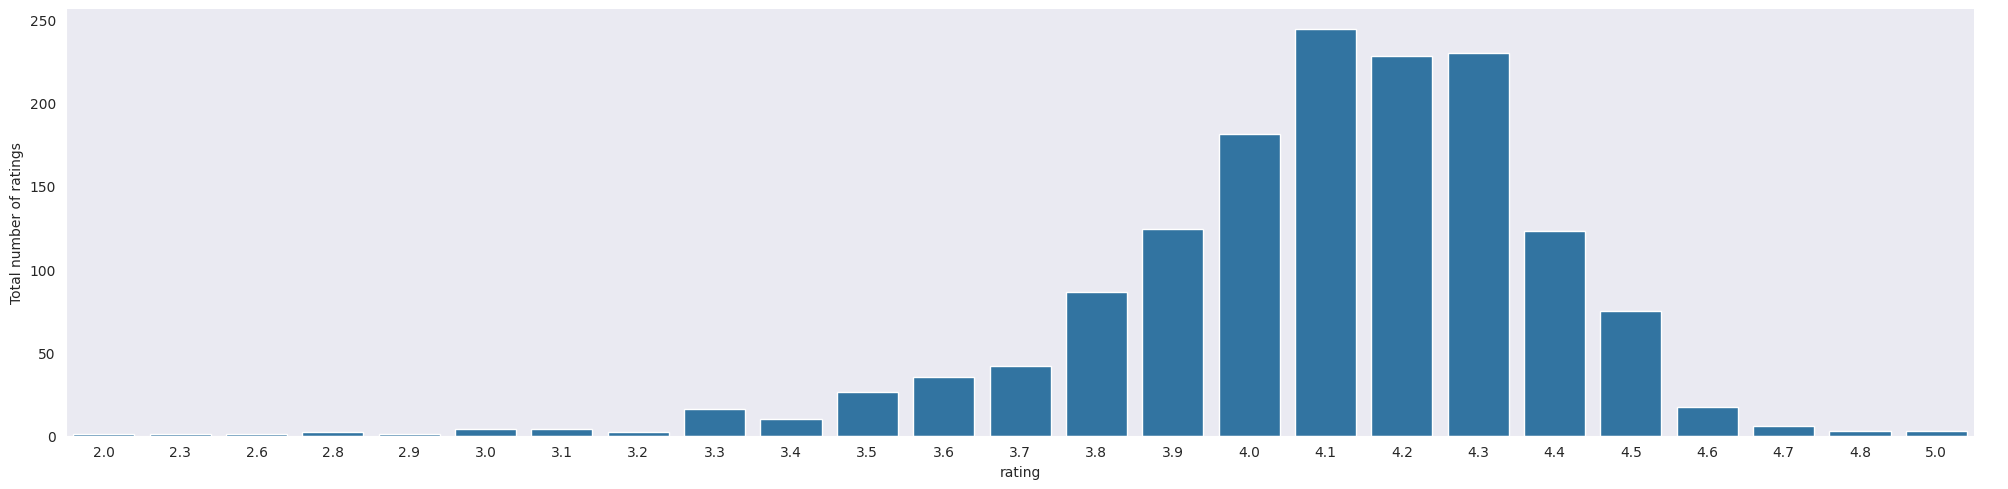

In [63]:

#most of the ratings are around the mid level from 3.9 -4.4, its generally lesser at the ends
with sns.axes_style("dark"):
  g = sns.catplot(x = "rating", data = Ratings, aspect = 4.0, kind = "count")
  g.set_ylabels("Total number of ratings")

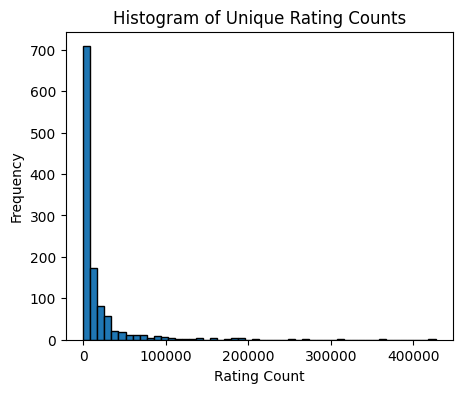

In [64]:

plt.figure(figsize=(5, 4))
plt.rcParams['patch.force_edgecolor'] = True

# Get unique rating_count values
unique_ratings = Ratings['rating_count'].unique()

# Plot histogram of unique values
plt.hist(unique_ratings, bins=50)
plt.xlabel("Rating Count")
plt.ylabel("Frequency")
plt.title("Histogram of Unique Rating Counts")
plt.show()


# **Recommendations System - Machine learning Approaches**

### **1. Popularity-Based System**
**Approach:** Recommend the most popular items based on rating_count.


**Evaluation:** Popularity-based systems are often evaluated based on business metrics like sales uplift or user engagement, as they don't personalize recommendations.

* Hit rate  $(\frac{hits}{Users})$

* Recall    $(\frac{Number of Relevant items in Top-k}{Total Number of Relevant Items})$

* Precison   $(\frac{Number of Relevant items in Top-K}{Total Number of items in
 Top-K Recommended})$

In [65]:
import pandas as pd

# Sample DataFrame (assuming 'Ratings' is your dataset)
df_ratings = Ratings.copy()

# Ensure numeric types
df_ratings['rating'] = pd.to_numeric(df['rating'])
df_ratings['rating_count'] = pd.to_numeric(df['rating_count'])
df_ratings['discount_percentage'] = pd.to_numeric(df['discount_percentage'])

# Define a weight for discount influence
discount_weight = 0.1

# Compute Popularity Score
df_ratings['popularity_score'] = (df_ratings['rating'] * df_ratings['rating_count']) + (df_ratings['discount_percentage'] * discount_weight)

# Sort items based on popularity
popular_items = df_ratings.groupby(['product_name','rating'])['popularity_score'].sum().reset_index()
popular_items = popular_items.sort_values(by='popularity_score', ascending=False)


top_n = 10
print(f"Top {top_n} Popular Products:")
print(tabulate(popular_items.head(top_n),headers = 'keys',tablefmt = 'grid' ))

popular_items.head(top_n).to_csv("popular_products.csv", index=False)

Top 10 Popular Products:
+------+-----------------------------------------------------------------------------------------------------------------------------------------+----------+--------------------+
|      | product_name                                                                                                                            |   rating |   popularity_score |
+======+=========================================================================================================================================+==========+====================+
|  101 | AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot                                                               |      4.4 |        3.75736e+06 |
+------+-----------------------------------------------------------------------------------------------------------------------------------------+----------+--------------------+
|   75 | Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black             


##### Hit_rate, Precison, Recall for popularity based



In [66]:
def hit_rate(predicted_top_products, actual_top_products, k):
  predicted_top_products = set(predicted_top_products[:k])
  actual_top_products = set(actual_top_products[:k])
  Model_check = len(predicted_top_products & actual_top_products)
  Hit_rate = Model_check/k
  return Hit_rate



def recall(predicted_top_products, actual_top_products, k):
    predicted_top_products = set(predicted_top_products[:k])
    actual_top_products = set(actual_top_products[:k])  # Adjusted
    relevant = len(predicted_top_products & actual_top_products)
    recall = relevant / len(actual_top_products) if len(actual_top_products) > 0 else 0
    return recall



def precision(predicted_top_products, actual_top_products, k):
  predicted_top_products = set(predicted_top_products[:k])
  actual_top_products = set(actual_top_products[:k])
  relevant_items = len(predicted_top_products & actual_top_products)
  precision =  relevant_items/len(predicted_top_products)
  return precision


predicted_top_products = df_ratings.sort_values(by='popularity_score', ascending=False)['product_id'].tolist()
actual_top_products = df.sort_values(by='rating_count', ascending=False)['product_id'].tolist()


recall = recall(predicted_top_products, actual_top_products, k=20)
precision = precision(predicted_top_products, actual_top_products, k=10)
hit_rate_10 = hit_rate(predicted_top_products,actual_top_products, k=10)
print(f"Hit Rate (Top 10): {hit_rate_10:.2f}")
print(f"Precision_Rate: {precision:.2f}")
print(f"Recall_Rate: {recall:.4f}")



with mlflow.start_run(run_name = "Hit_rate_popularty_RecSys"):
  mlflow.log_metric("Hit_rate",hit_rate_10)
  mlflow.log_metric("precision", round(precision,2))
  mlflow.log_metric("Recall",round(recall,4))
  mlflow.log_param("dataset_size", len(df))
  mlflow.set_tag("Top n", "Metric for popularity model")
  mlflow.log_artifact("popular_products.csv")



Hit Rate (Top 10): 0.80
Precision_Rate: 0.89
Recall_Rate: 0.9444


### **2. Content-Based System**
**Approach:** Use item features like category and about_product to recommend similar items.

**Evaluation:** Use precision, recall, and F1-score by comparing recommended items to a test set of user interactions.

---
**Evaluation Metrics**
----------
**Precision**: The fraction of recommended items that are relevant.  

$
\text{Precision} = \frac{\text{Number of Relevant Items Recommended}}{\text{Total Number of Items Recommended}}
$



**Recall**: The fraction of relevant items that are recommended.  

$
\text{Recall} = \frac{\text{Number of Relevant Items Recommended}}{\text{Total Number of Relevant Items}}
$


**F1-Score**: The harmonic mean of precision and recall.  

$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   int64  
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

Sepatated the user_id list to contain only one id per row

In [68]:
Ratings_cn = df[['user_id','product_id','product_name','rating','discounted_price',	'actual_price', 'discount_percentage',	'rating_count']]

Ratings_cn.loc[:,'user_id'] = Ratings_cn['user_id'].str.split(',')

ratings_df = Ratings_cn.explode('user_id').reset_index(drop=True)

ratings_df.head()

,user_id,product_id,product_name,rating,discounted_price,actual_price,discount_percentage,rating_count
0,AG3D6O4STAQKAY2UVGEUV46KN35Q,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,399.0,1099.0,0.64,24269
1,AHMY5CWJMMK5BJRBBSNLYT3ONILA,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,399.0,1099.0,0.64,24269
2,AHCTC6ULH4XB6YHDY6PCH2R772LQ,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,399.0,1099.0,0.64,24269
3,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,399.0,1099.0,0.64,24269
4,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,399.0,1099.0,0.64,24269


### **Content Based Filtering**





In [69]:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import mlflow
from itertools import combinations

# Content Based Recommendation System
# Assuming df is your input DataFrame
ratings_df = df[['user_id', 'product_id', 'product_name', 'rating', 'discounted_price', 'category',
                 'about_product', 'actual_price', 'discount_percentage', 'rating_count']].copy()

# Handle NaN values and ensure string type
ratings_df['category'] = ratings_df['category'].fillna('').astype(str)
ratings_df['about_product'] = ratings_df['about_product'].fillna('').astype(str)
ratings_df['combined_features'] = ratings_df['category'] + ' ' + ratings_df['about_product']

# Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(ratings_df['combined_features'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

def get_recommendations(product_index, cosine_sim=cosine_sim, n=10):
    try:
        sim_scores = list(enumerate(cosine_sim[product_index]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:n+1]  # Exclude the product itself
        product_indices = [i[0] for i in sim_scores]
        return ratings_df['product_name'].iloc[product_indices].tolist()
    except IndexError:
        return []

# ========= Evaluation Functions for Content-Based Recommendation System =========


def precision_at_k(recommended, relevant, k=10):
    """Calculate precision@k"""
    if not recommended or k <= 0:
        return 0
    recommended_at_k = recommended[:k]
    relevant_set = set(relevant)
    hits = len(set(recommended_at_k) & relevant_set)
    return hits / k



def recall_at_k(recommended, relevant, k=10):
    """Calculate recall@k"""
    if not recommended or not relevant or k <= 0:
        return 0
    relevant_set = set(relevant)
    hits = len(set(recommended[:k]) & relevant_set)
    return hits / len(relevant_set)



def f1_at_k(recommended, relevant, k=10):
    """Calculate F1-score@k"""
    precision = precision_at_k(recommended, relevant, k)
    recall = recall_at_k(recommended, relevant, k)
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)



def average_precision(recommended, relevant):
    relevant_set = set(relevant)  # Unique relevant items
    hits = 0
    sum_precision = 0
    for i, item in enumerate(recommended, 1):
        if item in relevant_set and hits < len(relevant_set):  # Cap at unique relevant items
            hits += 1
            sum_precision += hits / i
    return sum_precision / len(relevant_set) if len(relevant_set) > 0 else 0



def dcg_at_k(recommended, relevant, k):
    """Calculate Discounted Cumulative Gain"""
    relevant_set = set(relevant)
    dcg = 0
    for i, item in enumerate(recommended[:k], 1):
        if item in relevant_set:
            dcg += 1 / np.log2(i + 1)
    return dcg




def ndcg_at_k(recommended, relevant, k):
    dcg = dcg_at_k(recommended, relevant, k)
    sorted_relevant = sorted(relevant, key=lambda x: recommended.index(x) if x in recommended else float('inf'))

    ideal_dcg = dcg_at_k(sorted_relevant[:k], relevant, k)

    return dcg / ideal_dcg if ideal_dcg > 0 else 0




def reciprocal_rank(recommended, relevant):
    for i, item in enumerate(recommended, 1):
        if item in relevant:
            return 1 / i
    return 0



def average_similarity(query_index, recommended_products, cosine_sim):
    query_similarities = cosine_sim[query_index]
    recommended_indices = ratings_df[ratings_df['product_name'].isin(recommended_products)].index
    similarities = [query_similarities[idx] for idx in recommended_indices if idx < len(query_similarities)]
    return sum(similarities) / len(similarities) if similarities else 0



def diversity(recommended_products, cosine_sim, Ratings_cn):
    """Calculate intra-list diversity"""
    indices = ratings_df[ratings_df['product_name'].isin(recommended_products)].index.tolist()

    if len(indices) < 2:
        return 0  # Diversity not defined for <2 items
    sim_sum = 0
    count = 0
    for i, j in combinations(indices, 2):
        if i < len(cosine_sim) and j < len(cosine_sim):
            sim_sum += cosine_sim[i][j]
            count += 1
    avg_sim = sim_sum / count if count > 0 else 0
    return 1 - avg_sim  # Higher value = more diverse recommendations



# Evaluation and MLflow Run
sample_product_index = 1
sample_product_name = ratings_df['product_name'].iloc[sample_product_index]
recommended_products = get_recommendations(sample_product_index, n=10)

user_id = ratings_df.iloc[sample_product_index]['user_id']
relevant_items = ratings_df[ratings_df['user_id'] == user_id]['product_name'].tolist()

# Compute all evaluation metrics
k = 10
precision = precision_at_k(recommended_products, relevant_items, k)
recall = recall_at_k(recommended_products, relevant_items, k)
f1_score = f1_at_k(recommended_products, relevant_items, k)
map_score = average_precision(recommended_products, relevant_items)
ndcg_score = ndcg_at_k(recommended_products, relevant_items, k)
mrr_score = reciprocal_rank(recommended_products, relevant_items)
avg_sim = average_similarity(sample_product_index, recommended_products, cosine_sim)
div_score = diversity(recommended_products, cosine_sim,Ratings_cn)

# ============================ MLflow run ==================================
with mlflow.start_run(run_name="Content_Based_RecSys"):
    # Log parameters
    mlflow.log_param("dataset_size", len(df))
    mlflow.log_param("top_n", k)

    # Log artifacts
    pd.DataFrame(cosine_sim).to_csv("cosine_similarity_matrix.csv", index=False)
    mlflow.log_artifact("cosine_similarity_matrix.csv")

    # Log example recommendation
    mlflow.log_dict({"product_name": sample_product_name, "recommendations": recommended_products}, "recommendations.json")

    # Log metrics
    mlflow.log_metric("precision_at_10", precision)
    mlflow.log_metric("recall_at_10", recall)
    mlflow.log_metric("f1_score_at_10", f1_score)
    mlflow.log_metric("map_at_10", map_score)
    mlflow.log_metric("ndcg_at_10", ndcg_score)
    mlflow.log_metric("mrr", mrr_score)
    mlflow.log_metric("average_similarity", avg_sim)
    mlflow.log_metric("diversity", div_score)


# Print results
print(f"Recommendations for {sample_product_name}:\n")
for index, value in enumerate(recommended_products, start=1):
    print(f"{index}: {value}")
print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")
print(f"MAP: {map_score:.4f}")
print(f"NDCG: {ndcg_score:.4f}")
print(f"MRR: {mrr_score:.4f}")
print(f"Average Similarity: {avg_sim:.4f}")
print(f"Diversity: {div_score:.4f}")
print("\n")
print("Relevant items: \n")
for index,value in enumerate(relevant_items,start = 1):
  print(f"{index} {value}")

Recommendations for Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black):

1: Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)
2: Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)
3: Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C to Type C Cable for Smartphones, Tablets, Laptops & Other Type C Devices, PD Technology, 480Mbps Data Sync (RCTT15, Black)
4: Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C to Type C Cable for Smartphones, Tablets, Laptops & Other Type C Devices, PD Technology, 480Mbps Data Sync (RCTT15, Black)
5: Ambrane U

###  **Collabirative Filtering (SVD)**

In [70]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from collections import defaultdict


def precision_recall_f1_at_k(predictions, k=10, threshold=3.5):
    user_est_true = defaultdict(list)

    for uid, iid, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = {}
    recalls = {}
    f1_scores = {}
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        top_k = user_ratings[:k]

        n_relevant = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_recommended = sum((est >= threshold) for (est, _) in top_k)
        n_relevant_and_recommended = sum((true_r >= threshold and est >= threshold) for (est, true_r) in top_k)

        precisions[uid] = n_relevant_and_recommended / n_recommended if n_recommended else 0
        recalls[uid] = n_relevant_and_recommended / n_relevant if n_relevant else 0
        f1_scores[uid] = 2 * (precisions[uid] * recalls[uid]) / (precisions[uid] + recalls[uid]) if (precisions[uid] + recalls[uid]) else 0

    avg_precision = sum(precisions.values()) / len(precisions) if precisions else 0
    avg_recall = sum(recalls.values()) / len(recalls) if recalls else 0
    avg_f1 = sum(f1_scores.values()) / len(f1_scores) if f1_scores else 0

    return avg_precision, avg_recall, avg_f1


def get_top_n_recommendations(user_id, n=10):
    all_products = set(data['product_name'].unique())
    rated_products = set(data[data['user_id'] == user_id]['product_name'].values)
    unseen_products = all_products - rated_products


    user_ratings = [
        (product, algo.predict(user_id, product).est) for product in unseen_products
    ]
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    return [product for product, _ in user_ratings[:n]]


'''
Clone dataframe clean it and prepare for recommendations
'''
data = ratings_df[['user_id', 'product_name', 'rating']].copy()
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data = data.dropna()

reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data[['user_id', 'product_name', 'rating']], reader)

trainset, testset = train_test_split(surprise_data, test_size=0.2, random_state=303)

algo = SVD()
algo.fit(trainset)

predictions = algo.test(testset)
rmse_svm = accuracy.rmse(predictions)

precision, recall, f1 = precision_recall_f1_at_k(predictions, k=4, threshold=3.5)






print(f"Precision@10: {precision:.4f}")
print(f"Recall@10: {recall:.4f}")
print(f"F1@10: {f1:.4f}")

top_recommendations = get_top_n_recommendations(user_id, n=7)
user_id = 'AEWAZDZZJLQUYVOVGBEUKSLXHQ5A'
print(f"\nTop 10 recommendations for user {user_id}:")
for index, value in enumerate(top_recommendations):
    print(f"{index + 1}. {value}")



import mlflow

with mlflow.start_run(run_name="Collaborative Filtering Using SVD RecSys"):
    mlflow.log_metric("RMSE", round(rmse_svm, 4))
    mlflow.log_metric("Precision", round(precision, 4))
    mlflow.log_metric("Recall", round(recall, 4))
    mlflow.log_metric("F1", round(f1, 4))
    mlflow.log_param("user_id", user_id)

    for index, value in enumerate(top_recommendations):
        mlflow.log_param(f"top_recommendations_{index}", value)

RMSE: 0.2607
Precision@10: 0.9815
Recall@10: 0.9803
F1@10: 0.9808

Top 10 recommendations for user AEWAZDZZJLQUYVOVGBEUKSLXHQ5A:
1. Zebronics, ZEB-NC3300 USB Powered Laptop Cooling Pad with Dual Fan, Dual USB Port and Blue LED Lights
2. INOVERA World Map Extended Anti Slip Rubber Gaming Stitched Mouse Pad Desk Mat for Computer Laptop (Black, 900L x 400B x 2H mm)
3. Pigeon Polypropylene Mini Handy and Compact Chopper with 3 Blades for Effortlessly Chopping Vegetables and Fruits for Your Kitchen (12420, Green, 400 ml)
4. Zebronics Zeb-Transformer Gaming Keyboard and Mouse Combo (USB, Braided Cable)
5. Airtel Digital TV HD Set Top Box with FTA Pack | Unlimited Entertainment + Recording Feature + Free Standard Installation (6 Months Pack)
6. TCL 80 cm (32 inches) HD Ready Certified Android Smart LED TV 32S615 (Black)
7. Zoul USB C to USB C Fast Charging Cable 65W Type C to Type C Nylon Braided Cord Compatible with Macbook Oneplus 9 10R Samsung Galaxy S22 S21 Ultra Z Flip3 Macbook Air/Pro M

### **4. Hybrid Approach**
Approach: Combine content-based and collaborative filtering recommendations.


Evaluation: Use a combination of precision, recall, F1-score, and RMSE to evaluate the hybrid system.

In [71]:
import mlflow

def hybrid_recommendations(user_id, product_index,algo, n=10):
    # Get content-based recommendations
    content_recs = get_recommendations(product_index)

    # Get collaborative filtering recommendations
    all_product_names = df['product_name'].unique()
    user_ratings = [(product, algo.predict(user_id, product).est) for product in all_product_names]
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    collab_recs = [product for product, rating in user_ratings[:n]]

    # Combine and deduplicate recommendations
    combined_recs = list(set(content_recs) | set(collab_recs))

    return combined_recs[:n]

# Start MLflow experiment for logging hybrid recommendations only
with mlflow.start_run(run_name = "hybrid-aproach_RecSys"):  # Start the run under the experiment
    # Log parameters for this run
    user_id = 'A1'
    product_index = 0
    mlflow.log_param("user_id", user_id)
    mlflow.log_param("product_index", product_index)

    # Get hybrid recommendations
    recommendations = hybrid_recommendations(user_id, product_index,algo, n=10)

    # Log the hybrid recommendations as a parameter (may be large)
    mlflow.log_param("hybrid_recommendations", recommendations)

    # Print the product name and the hybrid recommendations
    product_name = df.iloc[product_index]['product_name']
    print(f"Hybrid Recommendations for product '{product_name}':\n")
    for i, rec in enumerate(recommendations, start=1):
        print(f"{i}. {rec}")


MlflowException: Param value '['Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)', 'FIGMENT Handheld Milk Frother Rechargeable, 3-Speed Electric Frother ' had length 1712, which exceeded length limit of 500

The cause of this error is typically due to repeated calls
to an individual run_id event logging.

Incorrect Example:
---------------------------------------
with mlflow.start_run():
    mlflow.log_param("depth", 3)
    mlflow.log_param("depth", 5)
---------------------------------------

Which will throw an MlflowException for overwriting a
logged parameter.

Correct Example:
---------------------------------------
with mlflow.start_run():
    with mlflow.start_run(nested=True):
        mlflow.log_param("depth", 3)
    with mlflow.start_run(nested=True):
        mlflow.log_param("depth", 5)
---------------------------------------

Which will create a new nested run for each individual
model and prevent parameter key collisions within the
tracking store.

In [ ]:
'''

original
4. Hybrid Approach
Approach: Combine content-based and collaborative filtering recommendations.


Evaluation: Use a combination of precision, recall, F1-score, and RMSE to evaluate the hybrid system.

def hybrid_recommendations(user_id, product_index, n=10):
    # Get content-based recommendations
    content_recs = get_recommendations(product_index)


    # Get collaborative filtering recommendations
    all_product_names = df['product_name'].unique()
    user_ratings = [(product, item_based_algo.predict(user_id, product).est) for product in all_product_names]
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    collab_recs = [product for product, rating in user_ratings[:n]]

    # Combine recommendations while preserving order and removing duplicates
    combined_recs = content_recs + [item for item in collab_recs if item not in content_recs]


    return combined_recs[:n]

# Example: Get top 10 hybrid recommendations for a user and a product
recommendations = hybrid_recommendations('A1', 44, n=10)
print("Top 10 Hybrid Recommendations:")
for i, rec in enumerate(recommendations, start=1):
    print(f"{i}. {rec}")




'''



# **Conclusion**

* Popularity-Based: Simple and effective for general recommendations.
* Content-Based: Personalized based on item features.
* Collaborative Filtering: Leverages user behavior for personalized recommendations.
* Hybrid: Combines strengths of both content-based and collaborative filtering for improved accuracy and diversity.

Each system can be evaluated using appropriate metrics, and the choice of system depends on the specific needs and constraints of your application.




Integrating fair and equitable principles into recommendation systems is essential to prevent harm, promote diversity, and ensure access to opportunities across digital platforms. This requires interdisciplinary collaboration among computer scientists, ethicists, social scientists, and affected stakeholders to design systems that are not only efficient, but just and inclusive.


# **References**

- Ekstrand, M. (n.d.). *NSF CAREER award on recommenders, humans, and data*. Michael Ekstrand on the Web. [https://md.ekstrandom.net/research/career](https://md.ekstrandom.net/research/career)

- Gunawardana, A., & Shani, G. (2009). *A survey of accuracy evaluation metrics of recommendation tasks*. Journal of Machine Learning Research, 10(12).

- Abdollahpouri, H., & Burke, R. (2019). *Multi-stakeholder recommendation and its connection to multi-sided fairness*. arXiv preprint [arXiv:1907.13158](https://arxiv.org/abs/1907.13158).

- Chokhra, P. (2021, December 28). *Evaluating Recommender Systems | Nerd for tech*. Medium. [https://medium.com/nerd-for-tech/evaluating-recommender-systems-590a7b87afa5](https://medium.com/nerd-for-tech/evaluating-recommender-systems-590a7b87afa5)

- Wang, Y., Ma, W., Zhang, M., Liu, Y., & Ma, S. (2023). *A survey on the fairness of recommender systems*. ACM Transactions on Information Systems, 41(3), 1–43.

- CS50. (2015, November 11). *Recommender Systems* [Video]. YouTube. [https://www.youtube.com/watch?v=Eeg1DEeWUjA](https://www.youtube.com/watch?v=Eeg1DEeWUjA)

- Data Mentor. (2022, July 10). *Learn recommendation systems in 2 hours* [Video]. YouTube. [https://www.youtube.com/watch?v=kPxASj5wJBY](https://www.youtube.com/watch?v=kPxASj5wJBY)

- freeCodeCamp.org. (2025, January 27). *LLM course – Build a Semantic Book Recommender (Python, OpenAI, LangChain, Gradio)* [Video]. YouTube. [https://www.youtube.com/watch?v=Q7mS1VHm3Yw](https://www.youtube.com/watch?v=Q7mS1VHm3Yw)

- NeuralNine. (2024, June 9). *Movie Recommender System in Python with LLMs* [Video]. YouTube. [https://www.youtube.com/watch?v=epidA1fBFtI](https://www.youtube.com/watch?v=epidA1fBFtI)
